# BIG_DATA FINAL 
### Done By: 
# Nursultan Zhakypzhan ,Estay Kargabay 

# Car database Data analysis
### import libraries
### load and prepare the dataset
### change the values to english
### 1.Analysis of vehicle price distribution based on model?
### 2. How many cars are available for sale across a given type's data set?
### 3. Analysis of the average price of vehicles based on fuel type and vehicle type?
### 4. Average prices of the brands and types of cars found in the analysis data set?
### 5. Create a pair of graphs that contain all the columns that contain the metrics?
### 6. According to the data, which brand sells more cars?
# Linear regression (car price)

<font color='blue' size='4'>Importing libraries</font>

In [50]:
# importing required libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
#sns.set(style="white")
from matplotlib import style
style.use('ggplot')
%matplotlib inline
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<font color='blue' size='4'> Load in the cleaned_autos.csv with read_csv() function and display first 5 rows</font>

In [51]:
# path to clean data
cars =  "dataset.csv"
# reading csv into raw dataframe
df = pd.read_csv(cars,encoding="utf8")
df.head()


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


<font color='blue' size='4'>Output all the column names of the dataframe</font>

In [52]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',
       'yearOfCreation', 'yearCrawled', 'monthOfCreation', 'monthCrawled',
       'NoOfDaysOnline', 'NoOfHrsOnline', 'yearsOld', 'monthsOld'],
      dtype='object')

<font color='blue' size='4'>The data was originally in German so converted to English here(change the values to english)</font>

In [53]:
df['seller'] = df['seller'].replace('privat','private')
df['seller'] = df['seller'].replace('gewerblich','commercial')

df['offerType'] = df['offerType'].replace('Angebot','offer')
df['offerType'] = df['offerType'].replace('Gesuch','petition')

df['gearbox'] = df['gearbox'].replace('manuell','manual')
df['gearbox'] = df['gearbox'].replace('automatik','automatic')

df['fuelType'] = df['fuelType'].replace('benzin','petrol')
df['fuelType'] = df['fuelType'].replace('andere','Others')
df['fuelType'] = df['fuelType'].replace('elektro','electric')

df['notRepairedDamage'] = df['notRepairedDamage'].replace('nein','no')
df['notRepairedDamage'] = df['notRepairedDamage'].replace('ja','yes')

df['vehicleType'] = df['vehicleType'].replace('kleinwagen','small_car')
df['vehicleType'] = df['vehicleType'].replace('andere','others')
df['vehicleType'] = df['vehicleType'].replace('kombi','wagon')

<font color='blue' size='4'>Describe data</font>

In [54]:
df.describe() # Describe data

,price,yearOfRegistration,powerPS,kilometer,postalCode,yearOfCreation,yearCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
count,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.0,313687.000000,313687.000000,313687.000000,313687.000000
mean,3902.961863,2001.909231,109.564250,131435.778340,50349.563597,2015.999930,2016.0,8.543274,11.834207,14.090769,6.235187
std,4168.150636,6.803211,191.741685,34963.149957,25765.545682,0.008374,0.0,8.511917,6.504730,6.803211,3.454766
min,0.000000,1910.000000,0.000000,5000.000000,1067.000000,2015.000000,2016.0,0.000000,0.000000,0.000000,1.000000
25%,999.000000,1998.000000,68.000000,125000.000000,29640.000000,2016.000000,2016.0,2.000000,7.000000,10.000000,3.000000
50%,2490.000000,2002.000000,104.000000,150000.000000,49205.000000,2016.000000,2016.0,6.000000,12.000000,14.000000,6.000000
75%,5400.000000,2006.000000,140.000000,150000.000000,70794.000000,2016.000000,2016.0,13.000000,17.000000,18.000000,9.000000
max,28800.000000,2016.000000,20000.000000,150000.000000,99998.000000,2016.000000,2016.0,384.000000,23.000000,106.000000,11.000000


<font color='blue' size='4'>Output the total number(sum) of null values by each column</font>

In [55]:
df.isnull().sum()  # output the total number(sum) of null values by each column

dateCrawled              0
name                     0
seller                   0
offerType                0
price                    0
abtest                   0
vehicleType              0
yearOfRegistration       0
gearbox                  0
powerPS                  0
model                    0
kilometer                0
monthOfRegistration      0
fuelType               189
brand                    0
notRepairedDamage        0
dateCreated              0
postalCode               0
lastSeen                 0
yearOfCreation           0
yearCrawled              0
monthOfCreation          0
monthCrawled             0
NoOfDaysOnline           0
NoOfHrsOnline            0
yearsOld                 0
monthsOld                0
dtype: int64

<font color='blue' size='4'>Dropping the missing values and show</font>

In [56]:
df = df.dropna() # dropping the missing values
df.isnull().sum() # output the total number(sum) of null values by each column

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
yearOfCreation         0
yearCrawled            0
monthOfCreation        0
monthCrawled           0
NoOfDaysOnline         0
NoOfHrsOnline          0
yearsOld               0
monthsOld              0
dtype: int64

## This analysis gives the distribution of car prices based on  car model.
## Price range varies with vehicle type
<font color='red' size='6'>Q1&A</font>

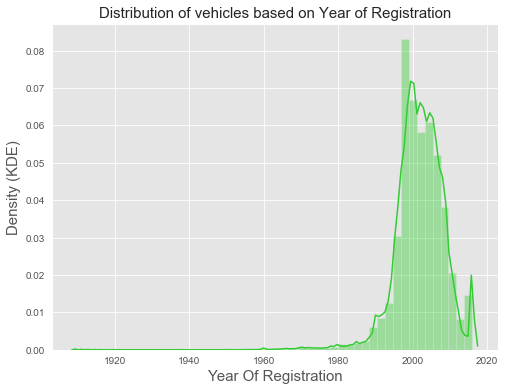

In [57]:
#Allocation by year of vehicle registration
fig, ax = plt.subplots(figsize=(8,6)) #set plot types
sns.distplot(df["yearOfRegistration"], color="#33cc33",kde=True, ax=ax)#set column for plot
ax.set_title('Distribution of vehicles based on Year of Registration', fontsize= 15) #set title
plt.ylabel("Density (KDE)", fontsize= 15)# write y axis label text
plt.xlabel("Year Of Registration", fontsize= 15)# write x axis label text
plt.show()#show

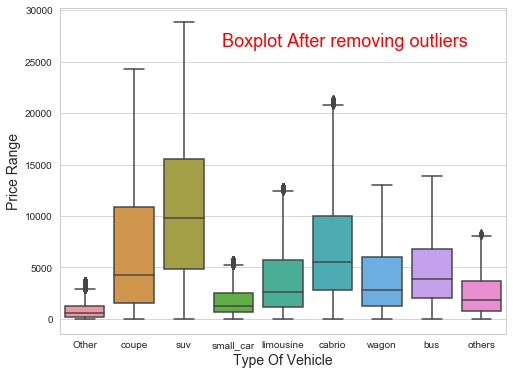

In [58]:
# view the distribution of outliers after deletion
sns.set_style("whitegrid")# set style 
fig, ax = plt.subplots(figsize=(8,6))# set plot types
sns.boxplot(x="vehicleType", y="price", data=df)# set column of data and data
ax.text(5.25,27000,"Boxplot After removing outliers",fontsize=18,color="r",ha="center", va="center")#write text for label
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':14})# write x axis label text
ax.yaxis.set_label_text("Price Range",fontdict= {'size':14})# write y axis label text
plt.show()

<font color='red' size='6'>Q2&A</font>
## amount of vehicles by type of vehicle available for sale
## The data set is available to sell cars

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Total count of vehicles on sale as per vehicle type')

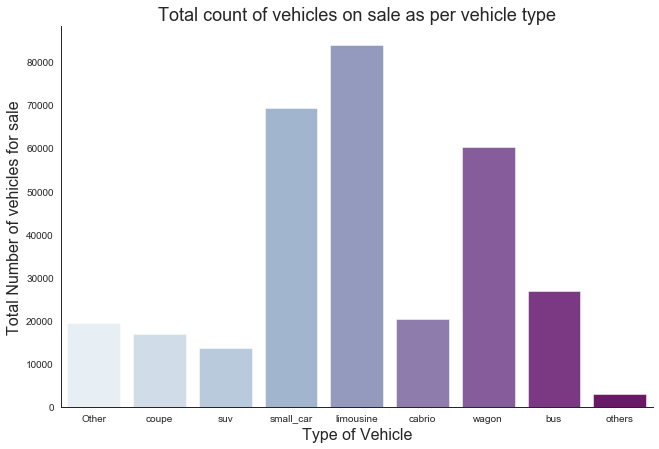

In [59]:
sns.set_style("white") #set style
g = sns.factorplot(x="vehicleType", data=df, kind="count", palette="BuPu", size=6, aspect=1.5)  #set type of plot
g.ax.xaxis.set_label_text("Type of Vehicle",fontdict= {'size':16}) # write x axis label text
g.ax.yaxis.set_label_text("Total Number of vehicles for sale", fontdict= {'size':16})  # write x axis label text
g.ax.set_title("Total count of vehicles on sale as per vehicle type",fontdict= {'size':18}) #write title for vizulazation

<font color='red' size='6'>Q3&A</font>
## Analysis of the average price of vehicles based on fuel type and vehicle type

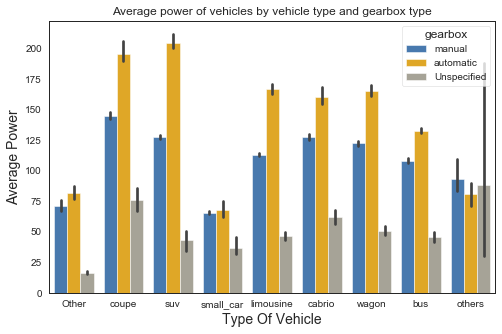

In [60]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
fig, ax = plt.subplots(figsize=(8,5))
sns.set_palette(sns.xkcd_palette(colors))
sns.barplot(x="vehicleType", y="powerPS",hue="gearbox",data=df)
ax.set_title("Average power of vehicles by vehicle type and gearbox type",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Power",fontdict= {'size':14})
plt.show()

## Average car price distribution based on fuel type and vehicle type

## Type Of Fuel

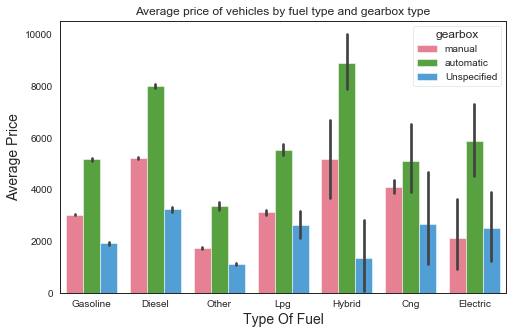

In [61]:
fig, ax = plt.subplots(figsize=(8,5)) #set plot
colors = ["#00e600", "#ff8c1a","#a180cc"] # set color
sns.barplot(x="fuelType", y="price",hue="gearbox", palette="husl",data=df) # set all necessary argument 
ax.set_title("Average price of vehicles by fuel type and gearbox type",fontdict= {'size':12})  #write title for vizulazation
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})  # write x axis label text
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})  # write y axis label text
plt.show() #display 

In [62]:
trial = pd.DataFrame()#create empy dataFrame
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)#write coment
trial.head(10)#show

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8008
2,volkswagen,suv,13946
3,volkswagen,small_car,1626
4,volkswagen,limousine,3743
5,volkswagen,cabrio,5784
6,volkswagen,wagon,3902
7,volkswagen,bus,5883
8,volkswagen,others,2604
9,audi,Other,1012


<font color='red' size='6'>Q4&A</font>
## Average price of a vehicle by vehicle type and gearbox type 

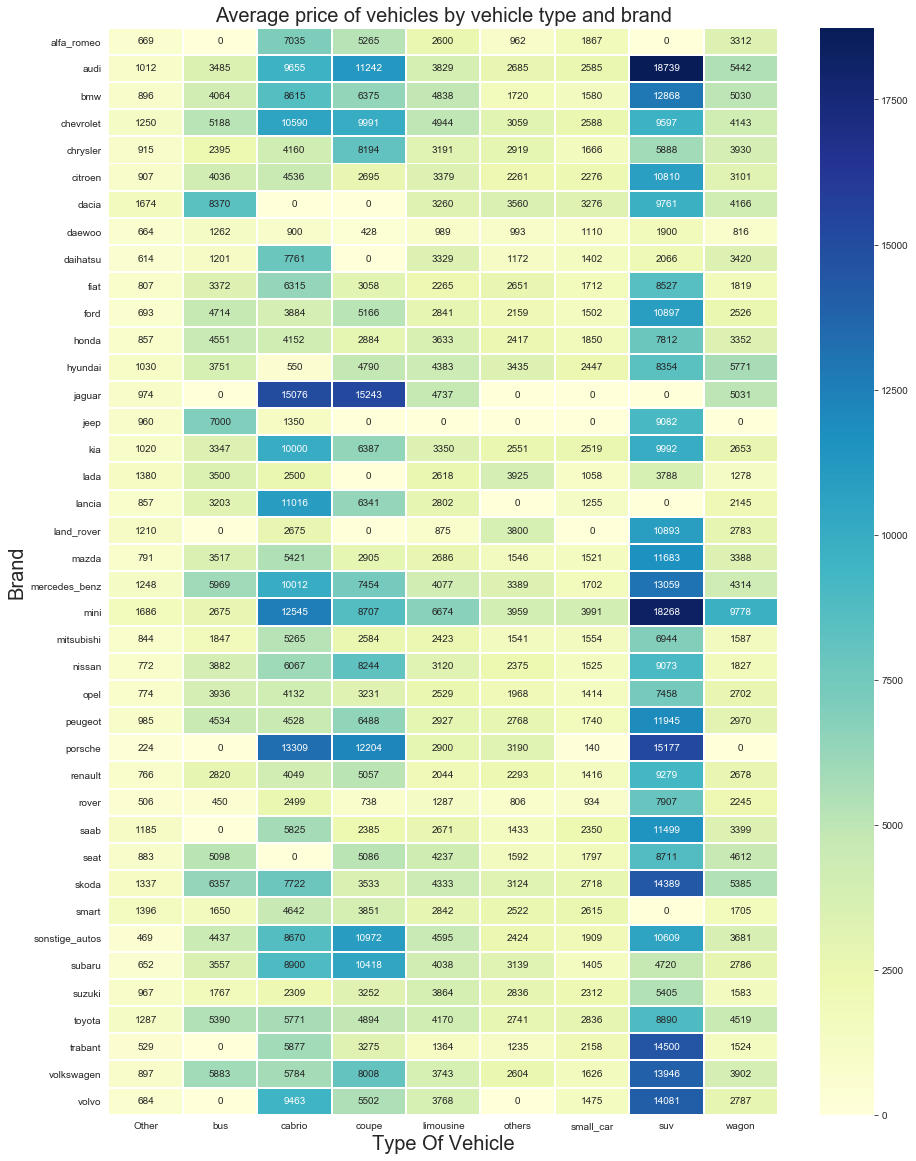

In [76]:
# HeatMap tp show average prices of vehicles by brand and type together
tri = trial.pivot("brand","vehicleType", "avgPrice")  #set columns 
fig, ax = plt.subplots(figsize=(15,20))  # set plots 
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Average price of vehicles by vehicle type and brand",fontdict={'size':20}) #write title for vizulazation
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':20})  # write x axis label text
ax.yaxis.set_label_text("Brand",fontdict= {'size':20})  # write y axis label text
plt.show()  #display

<font color='red' size='6'>Q5&A</font>
### Reduce the sample size to 300 for a clearer visualization
### Use seaborn to create a pair of graphs that contain all the columns that contain the metrics

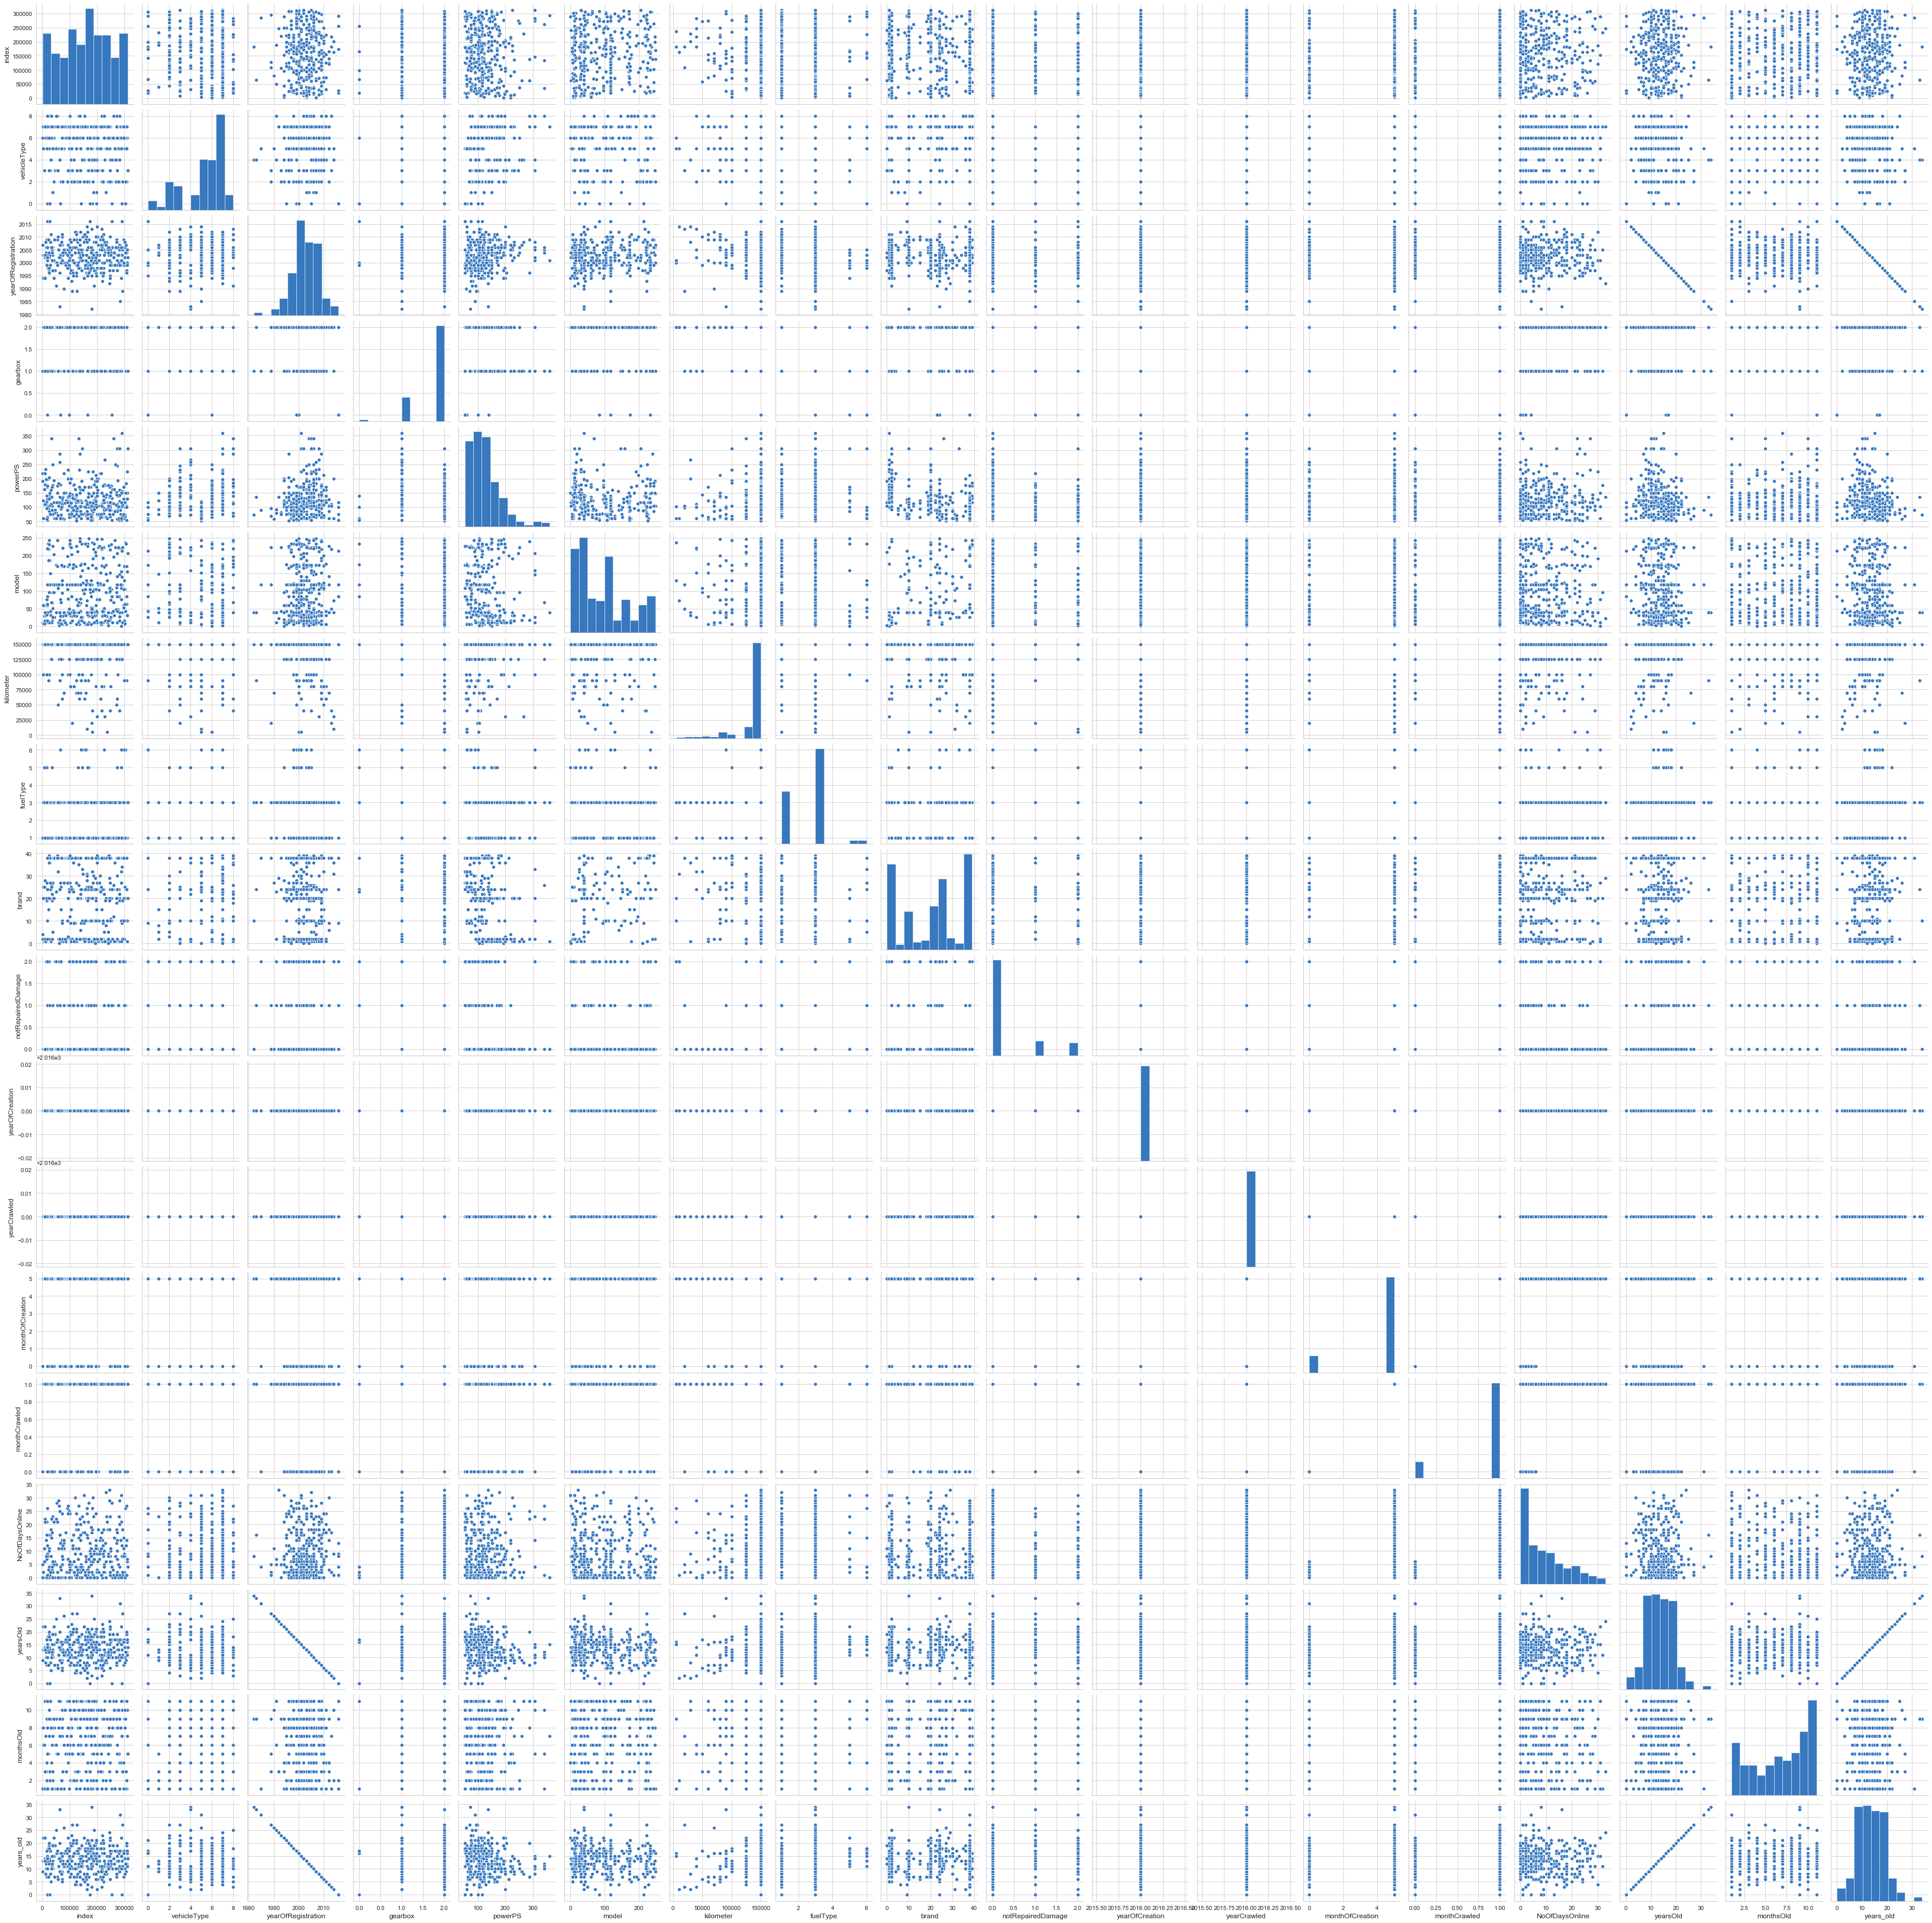

In [92]:
sns.pairplot(df.sample(350)) #compare all dataframe each other
plt.show()

<font color='red' size='6'>Q6&A</font>
##  sells more by brand

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


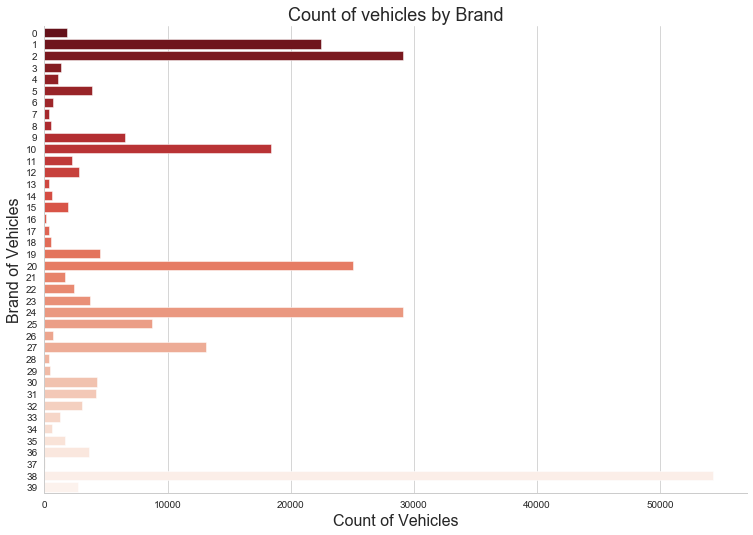

In [77]:
sns.set_style("whitegrid")  # set style
g = sns.factorplot(y="brand", data=df, kind="count",
                   palette="Reds_r", size=7, aspect=1.5)  ## set plot types
g.ax.set_title("Count of vehicles by Brand",fontdict={'size':18})  #write text for label
g.ax.xaxis.set_label_text("Count of Vehicles",fontdict= {'size':16}) # write x axis label text
g.ax.yaxis.set_label_text("Brand of Vehicles",fontdict= {'size':16}) # write y axis label text
plt.show() #display

## Linear regression (car price)
# Considering the various characteristics of the car, the car price is predictable.

In [78]:
df=pd.read_csv('dataset.csv', encoding='utf8')#write coment
df.head()#write coment
df.columns#write coment


Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',
       'yearOfCreation', 'yearCrawled', 'monthOfCreation', 'monthCrawled',
       'NoOfDaysOnline', 'NoOfHrsOnline', 'yearsOld', 'monthsOld'],
      dtype='object')

In [79]:
del_cols = ['dateCrawled','dateCreated','NoOfHrsOnline','lastSeen','postalCode','abtest'] # save all annecessaty aolumn as del_cols
df.drop(del_cols,axis=1,inplace=True) #delete del_cols

In [80]:
#create dataframe according to conditions
df= df[(df.yearOfRegistration <= 2016)& (df.yearOfRegistration >= 1975) & (df.price>=100) & (df.price<=150000) & (df.powerPS > 50)] 
df.shape #output all the column names of the dataframe

(261040, 21)

In [81]:
df = df.dropna() # dropping the missing values
df = df.reset_index() # delete index

In [82]:
df['years_old'] = df['yearOfRegistration'].apply(lambda x: 2016-x) # save yearofRegegistration as year_old

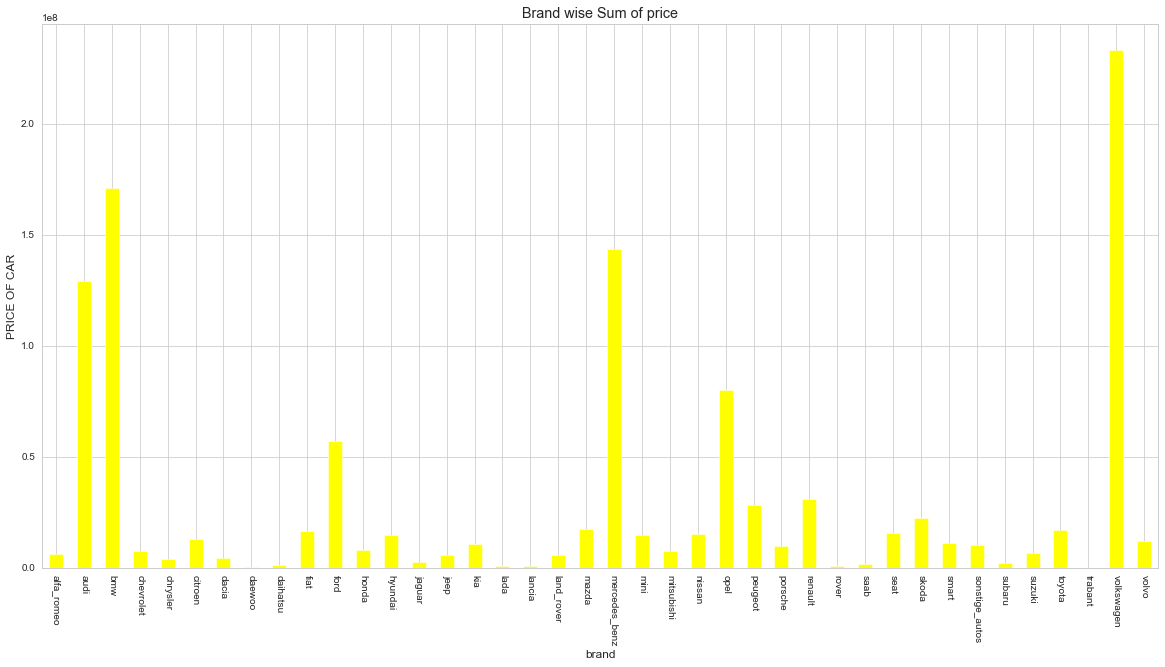

In [83]:
fig = plt.figure()# set plot figure 
ax = fig.add_subplot(111)#write coment
ax.set_xlabel('brand')  # set brand column on x axis label
ax.set_ylabel('PRICE OF CAR') #Y-axis on Price of car label
ax.set_title("Brand wise Sum of price") #set title of chart

F = df.groupby('brand').price.sum()# group brand by price
F.plot(kind='bar',figsize=(20,10),rot=-90,color='yellow')# show result

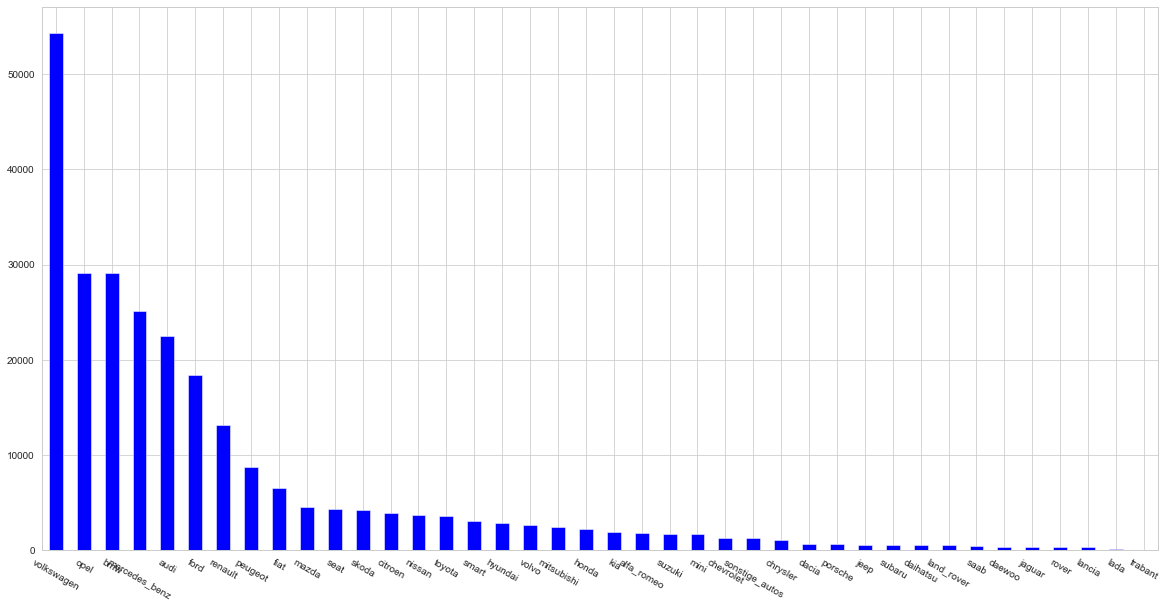

In [84]:
df['brand'].value_counts().plot(kind='bar',figsize=(20,10),rot=-30,color='blue')#plot brand according values

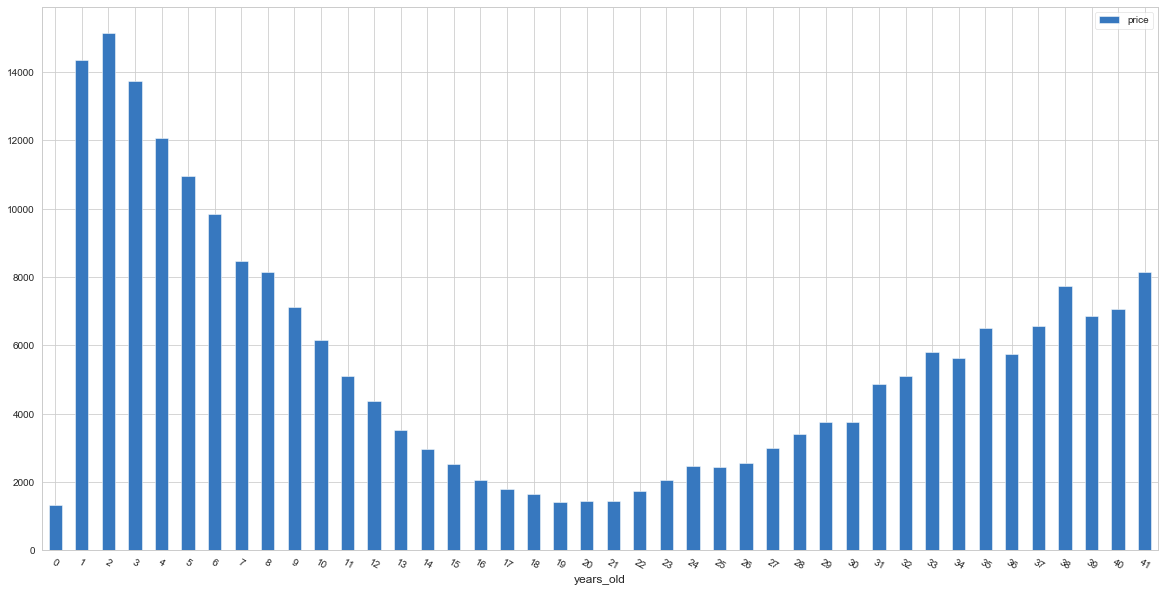

In [85]:
price_year = df[['price']].groupby(df['years_old']).mean()# plot price and years old avarage
price_year.plot(kind='bar',figsize=(20,10),rot=-30)# show result

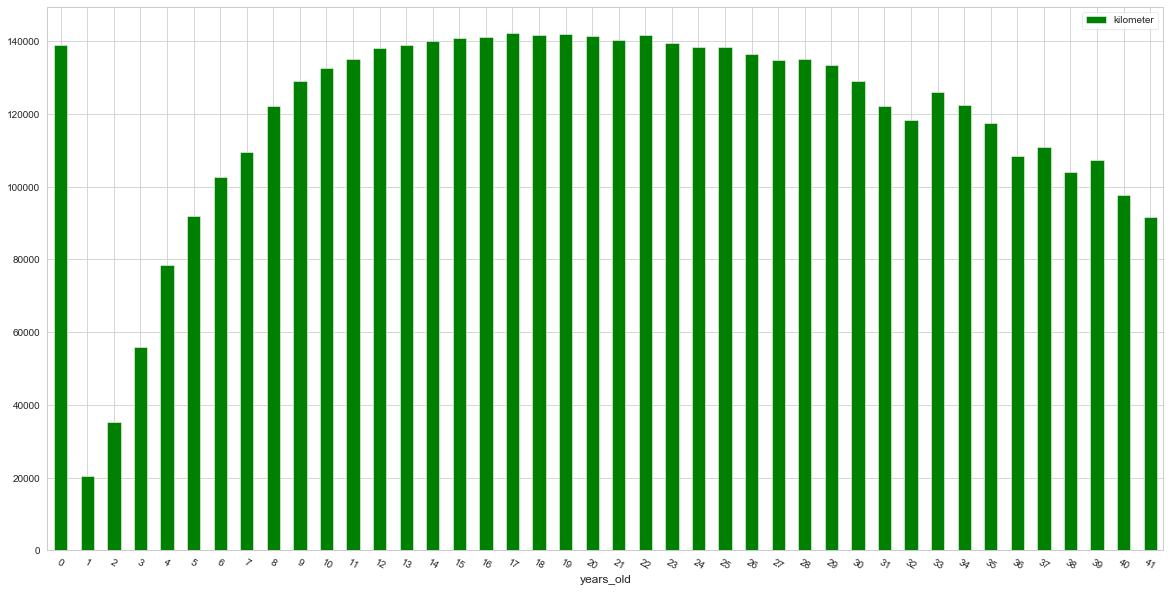

In [86]:
distance_year = df[['kilometer']].groupby(df['years_old']).mean()# set distance and year_old avarage on on distance_year
distance_year.plot(kind='bar',figsize=(20,10),rot=-30,color='green')# plot distance_year

### LABEL ENCODING

In [87]:
#create new columns based on the nomial values in "vehicleType", "gearbox", "fuelType", "brand" with 1 and 0 values 
#(depending on if the values/parameters are given in the car) to be able to fit them into the linear regression.    
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cat= df.columns[df.dtypes==object]
for col in cat:
    df[col]= le.fit_transform(df[col])


### Change the price to log value

In [88]:
df["PRICE_NEW"] = np.log1p(df["price"])# set df['PRICE_NEW'] value
Y = df['PRICE_NEW'] # set y value
name = df['name'] #set name   

In [89]:
drop_cols = ['name','price','PRICE_NEW','seller','offerType','monthOfRegistration']
df = df.drop(drop_cols,axis=1)# drop unnecessary columns

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(182692, 18)
(78297, 18)
(182692,)
(78297,)


In [91]:
print('LR model is starting...')#print title
#import all library
from sklearn.metrics import mean_squared_error, r2_score#write coment
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

LRmodel = LinearRegression()# declare LinearRegression 
LRmodel.fit(X_train, y_train) #fit data
y_pred = LRmodel.predict(X_test) # predict X_test

print('************************')
print('MSE:',mean_squared_error(y_test,y_pred)*100,"%") #print mean_squared_error
print('R2 score:',r2_score(y_test, y_pred)*100,"%") # print r2_score
print('************************')


LR model is starting...
************************
MSE: 58.184936309196 %
R2 score: 46.42862589825102 %
************************
